In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaler.fit(market_data_df)
scaled_data = scaler.transform(market_data_df)


In [6]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=market_data_df.columns, index=market_data_df.index)


# Copy the crypto names from the original data
scaled_df['Crypto Name'] = market_data_df.index


# Set the coinid column as index
scaled_df.set_index('Crypto Name', inplace=True)


# Display sample data
scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
Crypto Name,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 12)


# Create an empty list to store the inertia values
inertia_values = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    '(k)': k_values,
    'Inertia': inertia_values
}


# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


# Display the DataFrame
elbow_df

c:\Users\JOTA\anaconda3.1\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\JOTA\anaconda3.1\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\JOTA\anaconda3.1\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\JOTA\anaconda3.1\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans 

,(k),Inertia
0,1,287.000000
1,2,235.170001
2,3,134.771757
3,4,79.022435
4,5,66.413051
5,6,52.836588
6,7,49.413820
7,8,36.620449
8,9,33.038113
9,10,31.568532


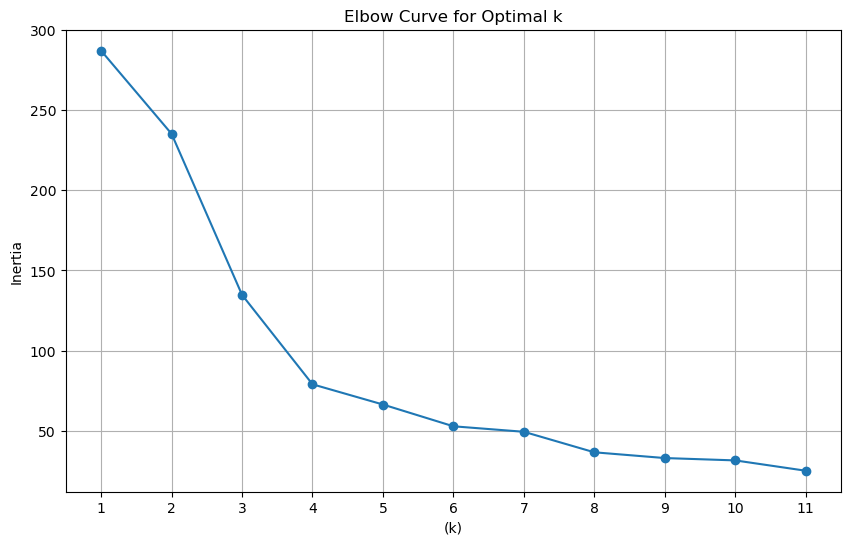

In [12]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(elbow_df['(k)'], elbow_df['Inertia'], marker='o', linestyle='-')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('(k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['(k)'])
plt.grid(True)
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [13]:
# Initialize the K-Means model using the best value for k
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(scaled_df)


c:\Users\JOTA\anaconda3.1\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [14]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_df)


c:\Users\JOTA\anaconda3.1\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [15]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans.predict(scaled_df)


# View the resulting array of cluster values.
cluster_labels

array([3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 3, 0, 0, 1, 0, 0, 0, 0])

In [16]:
# Create a copy of the DataFrame
clustered_df = scaled_df.copy()


In [20]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df['crypto_cluster'] = cluster_labels


# Display sample data
clustered_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
Crypto Name,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


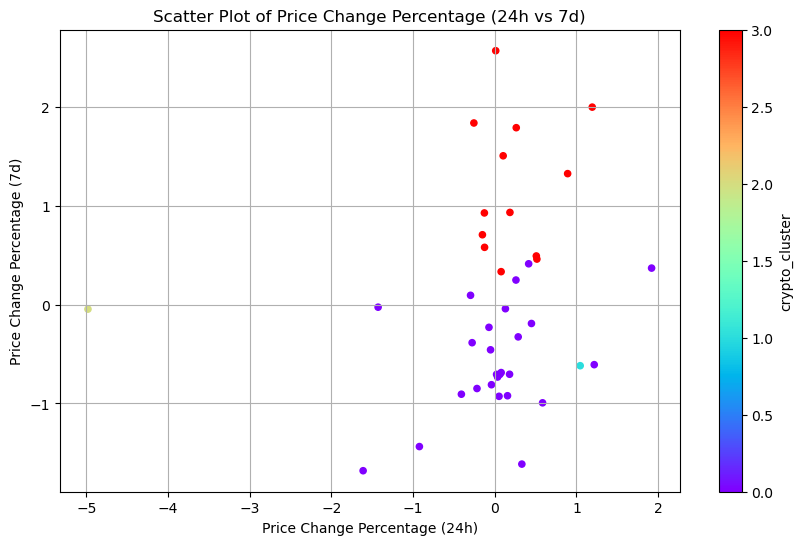

In [43]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
clustered_df.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="crypto_cluster", colormap="rainbow", figsize=(10, 6))
plt.title('Scatter Plot of Price Change Percentage (24h vs 7d)')
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')
plt.grid(True)
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [44]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [45]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_result = pca.fit_transform(scaled_df)


# View the first five rows of the DataFrame. 
pca_result[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [23]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5%

In [24]:
# Calculate the total explained variance
total_explained_variance = sum(explained_variance)

# Print the total explained variance
print("Total Explained Variance of the three principal components:", total_explained_variance)


Total Explained Variance of the three principal components: 0.895031657030984


In [27]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2', 'PCA3'])


# Copy the crypto names from the original data
pca_df['Crypto Name'] = clustered_df.index


# Set the coinid column as index
pca_df.set_index('Crypto Name', inplace=True)


# Display sample data
pca_df.head()

,PCA1,PCA2,PCA3
Crypto Name,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [29]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values_2 = range(1, 12)


# Create an empty list to store the inertia values
inertia_values_2 = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values_2:
    kmeans_2 = KMeans(n_clusters=k)
    kmeans_2.fit(pca_result)
    inertia_values_2.append(kmeans_2.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data_2 = {
    '(k_2)': k_values_2,
    'Inertia': inertia_values_2
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_2 = pd.DataFrame(elbow_data_2)


# Display the DataFrame
elbow_df_2

c:\Users\JOTA\anaconda3.1\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\JOTA\anaconda3.1\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\JOTA\anaconda3.1\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\JOTA\anaconda3.1\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans 

,(k_2),Inertia
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,38.072792
5,6,27.866859
6,7,26.794871
7,8,18.192181
8,9,22.087403
9,10,12.729957


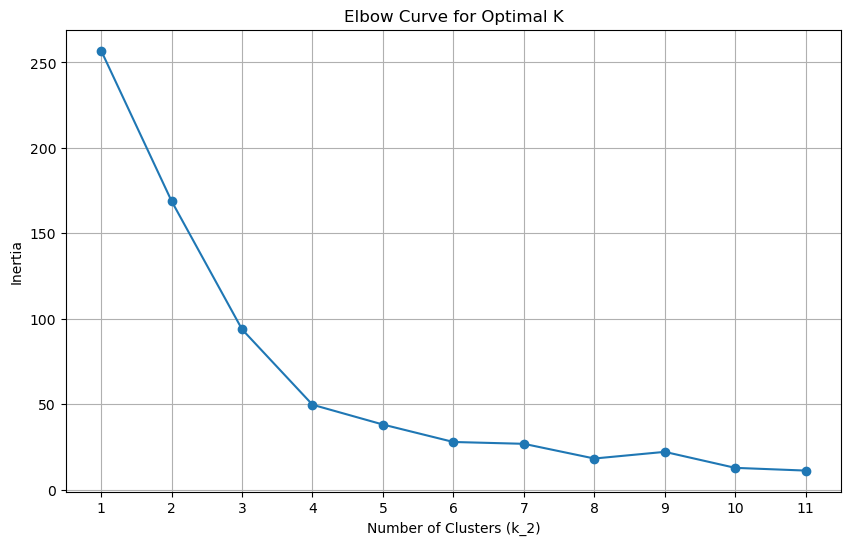

In [30]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df_2['(k_2)'], elbow_df_2['Inertia'], marker='o', linestyle='-')
plt.title('Elbow Curve for Optimal K')
plt.xlabel('Number of Clusters (k_2)')
plt.ylabel('Inertia')
plt.xticks(k_values_2)
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**  4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [31]:
# Initialize the K-Means model using the best value for k
best_kmeans_model = KMeans(n_clusters=4)
best_kmeans_model

KMeans(n_clusters=4)

In [32]:
# Fit the K-Means model using the PCA data
best_kmeans_model.fit(pca_result)


c:\Users\JOTA\anaconda3.1\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [33]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters = best_kmeans_model.predict(pca_result)


# Print the resulting array of cluster values.
predicted_clusters

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 3, 2, 2, 2, 2])

In [34]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()


# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['Predicted Cluster'] = predicted_clusters


# Display sample data
pca_df_copy.head()

,PCA1,PCA2,PCA3,Predicted Cluster
Crypto Name,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [36]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import hvplot.pandas

scatter_plot = pca_df_copy.hvplot.scatter(x='PCA1', y='PCA2', c='Predicted Cluster', cmap='viridis', title='Scatter Plot of PCA1 vs PCA2')
scatter_plot


:Scatter   [PCA1]   (PCA2,Predicted Cluster)

### Determine the Weights of Each Feature on each Principal Component

In [38]:
# Use the columns from the original scaled DataFrame as the index.
pca_df_copy_indexed = pca_df_copy.set_index(pca_df_copy.index)
scatter_plot_indexed = pca_df_copy_indexed.hvplot.scatter(x='PCA1', y='PCA2', c='Predicted Cluster', cmap='viridis', title='Scatter Plot of PCA1 vs PCA2 with Original Column Names as Index')
scatter_plot_indexed


:Scatter   [PCA1]   (PCA2,Predicted Cluster)

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** Price change
    

In [42]:
# Access the components from the PCA model
components = pca.components_

# Create a DataFrame to display the components
components_df = pd.DataFrame(components, columns=scaled_df.columns, index=[f'PC{i+1}' for i in range(components.shape[0])])

# Identify features with the strongest positive and negative influence on each component
strongest_influence = {}
for pc in components_df.index:
    component = components_df.loc[pc]
    strongest_positive = component.idxmax()
    strongest_negative = component.idxmin()
    strongest_influence[pc] = {'strongest_positive': strongest_positive, 'strongest_negative': strongest_negative}

# Display the features with the strongest positive and negative influence on each component
for pc, influence in strongest_influence.items():
    print(f"Principal Component {pc}:")
    print(f"Strongest Positive Influence: {influence['strongest_positive']}")
    print(f"Strongest Negative Influence: {influence['strongest_negative']}\n")





Principal Component PC1:
Strongest Positive Influence: price_change_percentage_200d
Strongest Negative Influence: price_change_percentage_24h

Principal Component PC2:
Strongest Positive Influence: price_change_percentage_30d
Strongest Negative Influence: price_change_percentage_1y

Principal Component PC3:
Strongest Positive Influence: price_change_percentage_7d
Strongest Negative Influence: price_change_percentage_60d

